In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=13*9,   input_dim=13,
                kernel_initializer='uniform', 
                activation='relu'))

In [10]:
model.add(Dense(units=13*8,   
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=13*7,   
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=13*6,   
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=13*5,   
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=13*4,   
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=13*3,   
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=13*2,   
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=13,   
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 117)               1638      
_________________________________________________________________
dense_2 (Dense)              (None, 104)               12272     
_________________________________________________________________
dense_3 (Dense)              (None, 91)                9555      
_________________________________________________________________
dense_4 (Dense)              (None, 78)                7176      
_________________________________________________________________
dense_5 (Dense)              (None, 65)                5135      
_________________________________________________________________
dense_6 (Dense)              (None, 52)                3432      
_________________________________________________________________
dense_7 (Dense)              (None, 39)                2067      
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 86104 samples, validate on 9568 samples
Epoch 1/30
86104/86104 [==============================] - 7s 80us/step - loss: 0.6800 - acc: 0.7816 - val_loss: 0.6394 - val_acc: 0.7774
Epoch 2/30
86104/86104 [==============================] - 2s 24us/step - loss: 0.4325 - acc: 0.7816 - val_loss: 0.3929 - val_acc: 0.7774
Epoch 3/30
86104/86104 [==============================] - 2s 24us/step - loss: 0.3715 - acc: 0.8116 - val_loss: 0.3639 - val_acc: 0.8432
Epoch 4/30
86104/86104 [==============================] - 2s 24us/step - loss: 0.3458 - acc: 0.8537 - val_loss: 0.3536 - val_acc: 0.8482
Epoch 5/30
86104/86104 [==============================] - 2s 23us/step - loss: 0.3407 - acc: 0.8550 - val_loss: 0.3495 - val_acc: 0.8489
Epoch 6/30
86104/86104 [==============================] - 2s 27us/step - loss: 0.3385 - acc: 0.8557 - val_loss: 0.3501 - val_acc: 0.8488
Epoch 7/30
86104/86104 [==============================] - 2s 23us/step - loss: 0.3375 - acc: 0.8555 - val_loss: 0.3473 - val_acc:

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

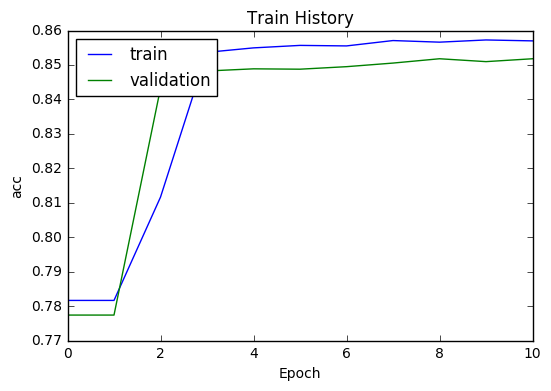

In [23]:
show_train_history(train_history,'acc','val_acc')

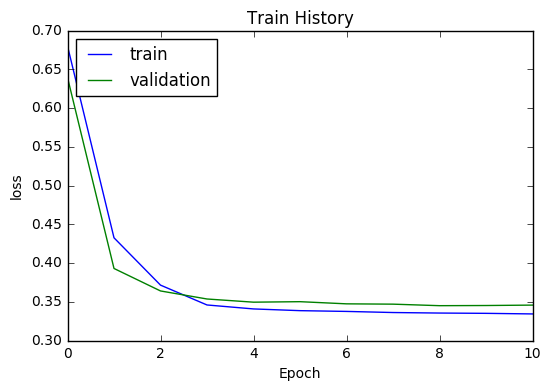

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 1s 40us/step


In [26]:
scores[1]

0.8554645037210469